In [1]:
# Setup.
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


# Utils.
# Activation function.
def tanh(z):
    a = np.tanh(z)
    return a


# NN model.
def model(X, y, num_iters, learning_rate, k):
    # Initialize params.
    W1 = np.random.randn(k, 1) * 0.01
    B1 = np.random.randn(k, 1) * 0.01
    W2 = np.random.randn(1, k) * 0.01
    B2 = np.random.randn(1, 1) * 0.01

    for i in range(num_iters):
        # Forward propagation.
        Z1 = np.dot(W1, X) + B1
        A1 = tanh(Z1)
        Z2 = np.dot(W2, A1) + B2
        A2 = Z2

        # Backward propagation.
        m = len(y)
        for i in range(2, 0, -1):
            if i == 2:
                dA = (1 / m) * (A2 - y)
                dZ = dA
            else:
                dA = np.dot(W2.T, dZ) * (1 - np.tanh(np.dot(W2, A1) + B1)**2)
                dZ = np.multiply(dA, np.where(A1 >= 0, 1, 0))

            if i == 1:
                dW1 = 1/m * np.dot(dZ, X.T)
                dB1 = 1/m * np.sum(dZ, axis=1, keepdims=True)
            else:
                dW2 = 1/m * np.dot(dZ, A1.T)
                dB2 = 1/m * np.sum(dZ, axis=1, keepdims=True)

        # Update.
        W1 = W1 - learning_rate * dW1
        B1 = B1 - learning_rate * dB1
        W2 = W2 - learning_rate * dW2
        B2 = B2 - learning_rate * dB2
      
    return W1, W2, B1, B2

# NN model - predict function.
def predict(X, W1, W2, B1, B2):
    Z1 = np.dot(W1, X) + B1
    A1 = tanh(Z1)
    Z2 = np.dot(W2, A1) + B2
    A2 = Z2

    return A2.T

# NN model - compute RMSE function.
def compute_residual(X, y, W1, W2, B1, B2):
    y_hat = predict(X, W1, W2, B1, B2)
    
    res = np.sqrt(mean_squared_error(y, y_hat))

    return res

# Expoenential model.
def exp_model(x):
    return 233.846 * (1 - math.exp(-0.006042 * x))

In [2]:
# Data.
# Features.
X = [15,15,15,18,28,29,37,37,44,50,50,60,61,64,65,65,72,75,75,82,85,91,91,97,98,125,142,142,147,147,150,159,165,183,192,195,218,218,219,224,225,227,232,232,237,246,258,276,285,300,301,305,312,317,338,347,354,357,375,394,513,535,554,591,648,660,705,723,756,768,860]
# Target.
y = [21.66,22.75,22.3,31.25,44.79,40.55,50.25,46.88,52.03,62.47,61.13,81,73.90,79.09,79.51,65.31,71.9,86.1,94.6,92.5,105,101.7,102.9,110,104.3,134.9,130.68,140.58,155.3,152.2,144.5,142.15,139.81,153.22,145.72,161.1,174.18,173.03,173.54,178.86,177.68,173.73,159.98,161.29,187.07,176.13,183.4,186.26,189.66,189.09,186.7,186.8,195.1,216.41,203.23,188.38,189.7,195.31,202.63,224.82,203.3,209.7,233.9,234.7,244.3,231,242.4,230.77,242.57,232.12,246.7]

X = np.array(X).reshape((71, 1))
y = np.array(y).reshape((71,))  

scores = []
for k in range(32, 513, 16):
    # Initialize basic hyperparameters.    
    layer_sizes = [1, k, 1]                                                       
    num_iters = 2000                                                                  
    learning_rate = 0.1  

    # Model.
    W1, W2, B1, B2 = model(X.T, y.T, num_iters, learning_rate, k)  

    # Training error.
    error = compute_residual(X.T, y.T, W1, W2, B1, B2)  
    print('RMSE (Training Data) = ', error)
    scores.append(error)

RMSE (Training Data) =  9.199520978414695
RMSE (Training Data) =  14.126925759262956
RMSE (Training Data) =  8.897061429973046
RMSE (Training Data) =  8.88057368822062
RMSE (Training Data) =  10.058237592697186
RMSE (Training Data) =  9.251513061835391
RMSE (Training Data) =  8.99600950685744
RMSE (Training Data) =  7.974359159847463
RMSE (Training Data) =  8.664667567748673
RMSE (Training Data) =  9.009706744617914
RMSE (Training Data) =  8.259886507911613
RMSE (Training Data) =  8.137863337238674
RMSE (Training Data) =  8.11193055216298
RMSE (Training Data) =  8.258183131022095
RMSE (Training Data) =  7.998686132789072
RMSE (Training Data) =  7.973626670628834
RMSE (Training Data) =  8.208732142737558
RMSE (Training Data) =  7.982765323428841
RMSE (Training Data) =  7.860151170901908
RMSE (Training Data) =  7.871460253901566
RMSE (Training Data) =  8.039159576403582
RMSE (Training Data) =  7.9071631662230475
RMSE (Training Data) =  8.023331086471073
RMSE (Training Data) =  7.84601155

In [3]:
# Exponential model predictions.
y_exp = [exp_model(x) for x in X]

# Learned model predictions.
y_hat = predict(X.T, W1, W2, B1, B2)

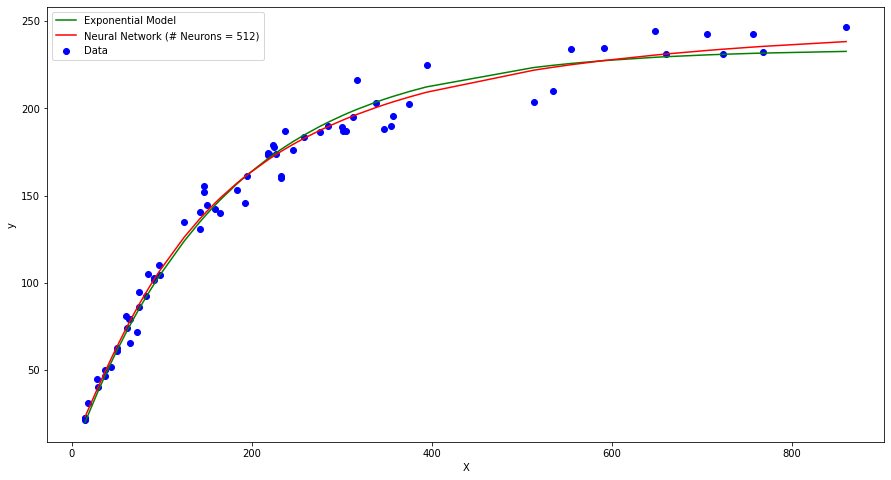

In [4]:
# Models.
plt.figure(figsize=(15, 8))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_exp, color='green', label='Exponential Model')
plt.plot(X, y_hat, color='red', label='Neural Network (# Neurons = 512)')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.show()

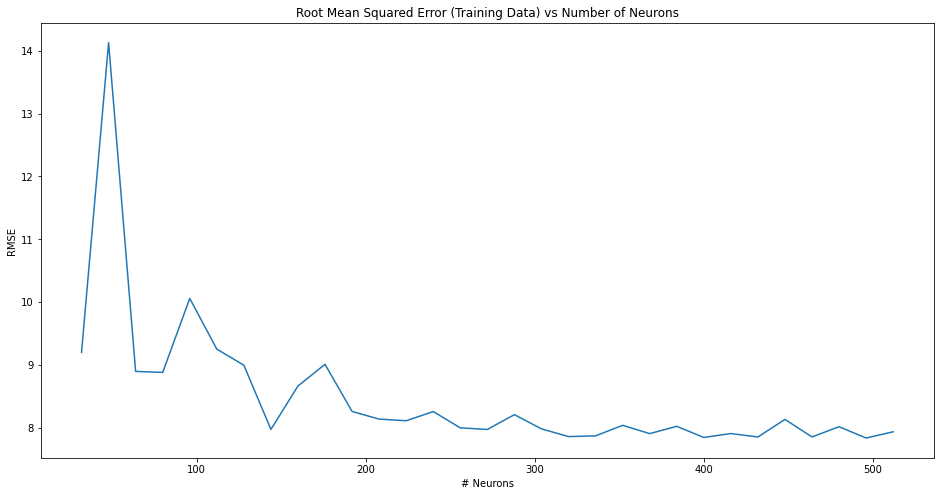

In [5]:
# RMSE vs Number of neurons.
plt.figure(figsize=(16, 8))
plt.plot(range(32, 513, 16), scores)
plt.xlabel('# Neurons')
plt.ylabel('RMSE')
plt.title('Root Mean Squared Error (Training Data) vs Number of Neurons')
plt.show()